In [1]:
import pandas as pd
import seaborn as sns

In [4]:
def read_file(fname, enc='iso8859-8'):
    fd = open(fname, encoding=enc, errors='replace')
    df = pd.read_csv(fd, sep='|')
    return df

def add_model(df):
    df['model'] = df.apply(lambda x: '_'.join([x[y] for y in ['tozeret_cd', 'degem_cd', 'shnat_yitzur', 'sug_degem']]), axis=1)

def get_model_name(ns):
    names = pd.DataFrame(data={'model':ns})
    ret = pd.merge(names, models, how='left', on='model')[['tozeret_nm', 'kinuy_mishari']]
    return ret

In [5]:
# source : https://data.gov.il/dataset/private-and-commercial-vehicles/resource/053cea08-09bc-40ec-8f7a-156f0677aff3?inner_span=True

#df = pd.read_csv('data/rechev-small.csv', encoding='iso-8859-1', sep='|')

fname = 'data/rechev.csv'
df = read_file(fname)

for c in ['mispar_rechev', 'degem_cd', 'tozeret_cd', 'shnat_yitzur']:
    df[c] = df[c].astype(str)

add_model(df)

In [6]:
# source : https://data.gov.il/dataset/mehir_yevuan
# add model prices
fname = 'data/vehicle_cost.csv'
fd = open(fname, encoding='utf-8', errors='replace')
prices = pd.read_csv(fd, sep='|', low_memory=False)

for c in ['degem_cd', 'tozeret_cd', 'shnat_yitzur']:
    prices[c] = prices[c].astype(str)
for c in ['mehir']:
    prices[c] = pd.to_numeric(prices[c], errors='coerce')

add_model(prices)
prices_ = prices.copy()
prices = prices[['model', 'mehir']]
df = pd.merge(left=df, right=prices, on='model')

In [7]:
df['score'] = df['mispar_rechev'].apply(score)

In [8]:
df['test']= pd.to_datetime(df.mivchan_acharon_dt)

In [9]:
df['test_expiry']= pd.to_datetime(df.tokef_dt)

<AxesSubplot:>

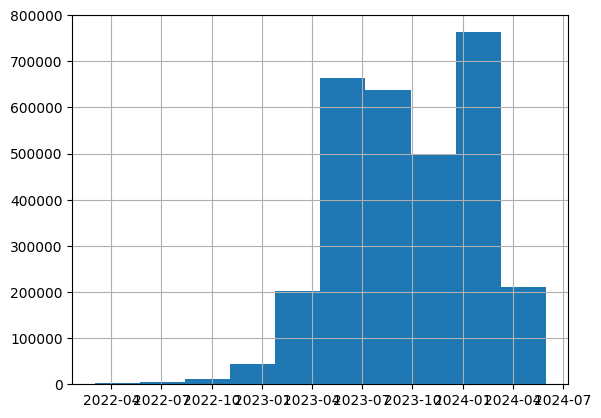

In [10]:
df.query('test > "2022-01-01"')['test_expiry'].hist()

In [11]:
df['d_test_expiry'] = df['test_expiry'] - df['test']

In [12]:
t = pd.to_timedelta('2000D')
#df.query('not (test == "1900-01-01") and d_test_expiry > @t')
df.query('d_test_expiry > @t')['test'].value_counts()

1900-01-01    5
Name: test, dtype: int64

In [13]:
x = pd.DataFrame(df.query('d_test_expiry < @t')['d_test_expiry'].dt.total_seconds())

<AxesSubplot:>

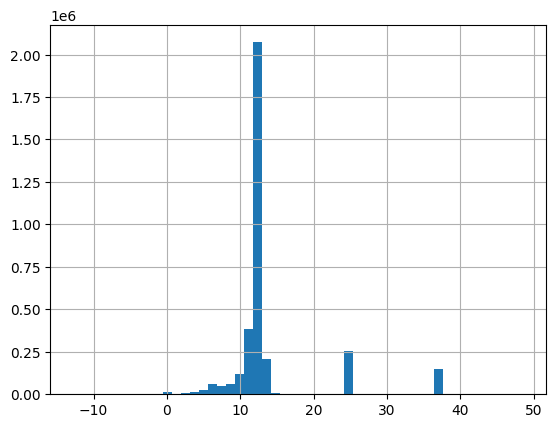

In [14]:
x['months'] = x['d_test_expiry'] / (60*60*24*30)
x['months'].hist(bins=50)

<AxesSubplot:>

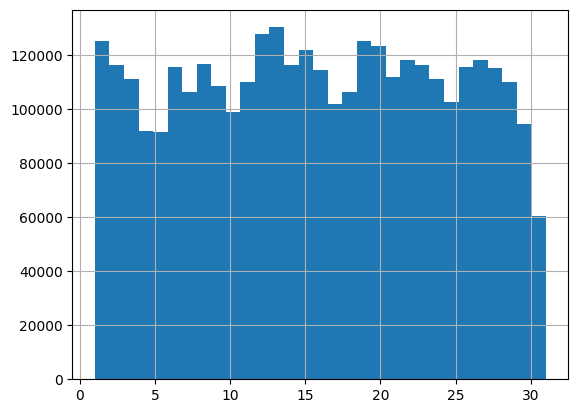

In [38]:
df['test'].dt.day.hist(bins=31)

<AxesSubplot:>

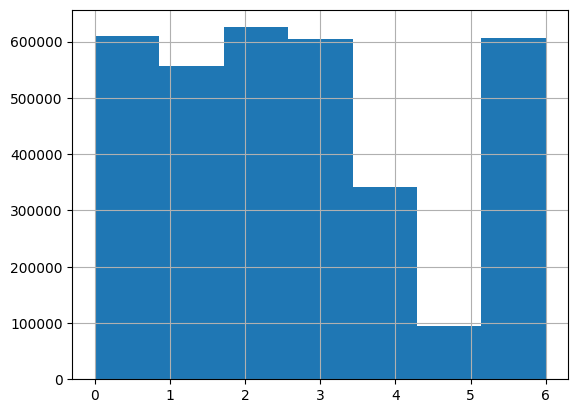

In [19]:
df['test'].dt.weekday.hist(bins=7)

<AxesSubplot:>

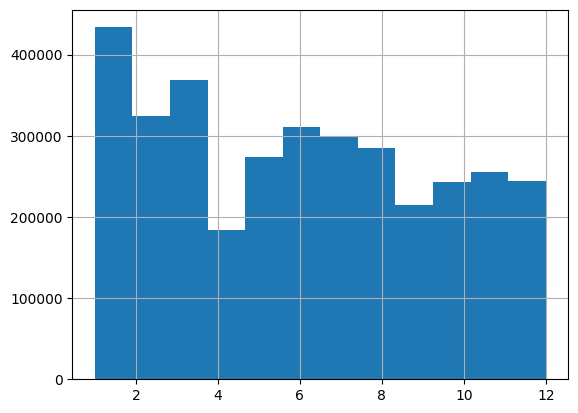

In [20]:
df['test'].dt.month.hist(bins=12)

<AxesSubplot:>

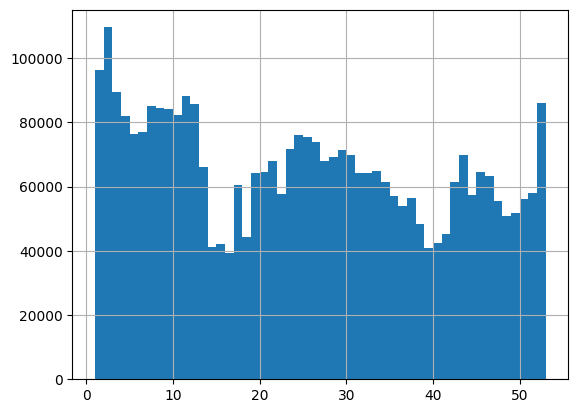

In [25]:
df['test'].dt.isocalendar().week.hist(bins=52)

<AxesSubplot:>

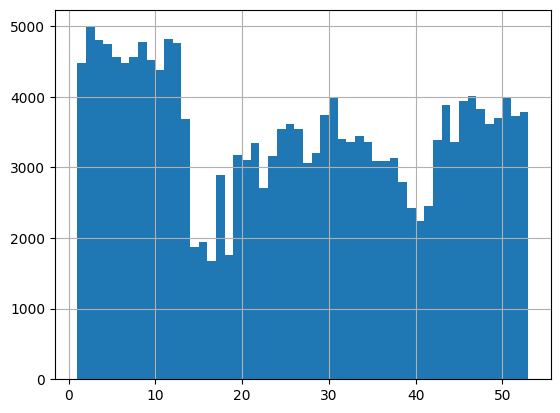

In [36]:
df[df['sug_degem'] == 'M']['test'].dt.isocalendar().week.hist(bins=52)

In [34]:
df.iloc[0].to_dict()

{'mispar_rechev': '1000052',
 'tozeret_cd': '404',
 'sug_degem': 'P',
 'tozeret_nm': 'לקסוס יפן',
 'degem_cd': '19',
 'degem_nm': 'USF40L-AEZGHW',
 'ramat_gimur': 'PREMIUM',
 'ramat_eivzur_betihuty': nan,
 'kvutzat_zihum': 15.0,
 'shnat_yitzur': '2013',
 'degem_manoa': '1UR',
 'mivchan_acharon_dt': '2022-05-01',
 'tokef_dt': '2023-04-20',
 'baalut': 'פרטי',
 'misgeret': 'JTHBL46FX05120098',
 'tzeva_cd': 80,
 'tzeva_rechev': 'שנהב לבן',
 'zmig_kidmi': '245/45R19',
 'zmig_ahori': '245/45R19',
 'sug_delek_nm': 'בנזין',
 'horaat_rishum': 130298.0,
 'moed_aliya_lakvish': '2013-4',
 'kinuy_mishari': 'LEXUS LS460',
 'model': '404_19_2013_P',
 'mehir': 805000.0,
 'score': 8,
 'test': Timestamp('2022-05-01 00:00:00'),
 'test_expiry': Timestamp('2023-04-20 00:00:00'),
 'd_test_expiry': Timedelta('354 days 00:00:00'),
 'test_month': 1}

<AxesSubplot:>

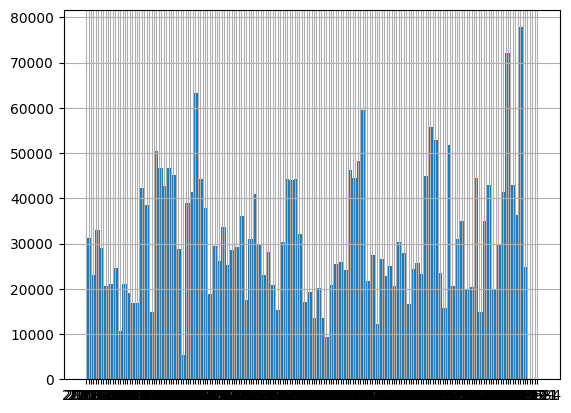

In [37]:
df['moed_aliya_lakvish'].hist(bins=100)